###### In this project, we intend to develop a model to make predictions for the number of prisoners we have based on the factors like burglary, larceny, man\_slaughter, etc. depending on how many null values these columns have. Further in the next few cells in this training file, we will show up what visualizations we create to understand the factors we need to be taken into consideration.



## Imports



In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import math

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

from sklearn.metrics import confusion_matrix

## Data Information and Cleaning



In [74]:
crime_df = pd.read_csv("crimes.csv")

In [75]:
for x in range(17):
    print(crime_df.columns.values[x], crime_df.iloc[:,x].isna().sum())
crime_df = crime_df.dropna(subset=['crime_reporting_change'])

jurisdiction 0
includes_jails 0
year 0
prisoner_count 0
crime_reporting_change 17
crimes_estimated 17
state_population 17
violent_crime_total 17
murder_manslaughter 17
rape_legacy 67
rape_revised 617
robbery 17
agg_assault 17
property_crime_total 17
burglary 17
larceny 17
vehicle_theft 17


In [76]:
# Check for null values and remove null values from columns

crime_df['rape_legacy'] = crime_df['rape_legacy'].fillna(crime_df['rape_legacy'].mean())
crime_df.isnull().sum()

jurisdiction                0
includes_jails              0
year                        0
prisoner_count              0
crime_reporting_change      0
crimes_estimated            0
state_population            0
violent_crime_total         0
murder_manslaughter         0
rape_legacy                 0
rape_revised              600
robbery                     0
agg_assault                 0
property_crime_total        0
burglary                    0
larceny                     0
vehicle_theft               0
dtype: int64

In [77]:
crime_df

jurisdiction  includes_jails  year  prisoner_count  \
1          ALABAMA           False  2001           24741   
2           ALASKA            True  2001            4570   
3          ARIZONA           False  2001           27710   
4         ARKANSAS           False  2001           11489   
5       CALIFORNIA           False  2001          157142   
..             ...             ...   ...             ...   
811       VIRGINIA           False  2016           29882   
812     WASHINGTON           False  2016           17228   
813  WEST VIRGINIA           False  2016            5899   
814      WISCONSIN           False  2016           23163   
815        WYOMING           False  2016            2352   

    crime_reporting_change crimes_estimated  state_population  \
1                    False            False         4468912.0   
2                    False            False          633630.0   
3                    False            False         5306966.0   
4                    False            False         2694698.0   
5                    False            False        34600463.0   
..                     ...              ...               ...   
811                  False            False         8414380.0   
812                  False            False         7280934.0   
813                  False            False         1828637.0   
814                  False            False         5772917.0   
815                  False            False          584910.0   

     violent_crime_total  murder_manslaughter  rape_legacy  rape_revised  \
1                19582.0                379.0  1369.000000           NaN   
2                 3735.0                 39.0   501.000000           NaN   
3                28675.0                400.0  1518.000000           NaN   
4                12190.0                148.0   892.000000           NaN   
5               212867.0               2206.0  9960.000000           NaN   
..                   ...                  ...          ...           ...   
811              18495.0                482.0  1788.339119        2830.0   
812              22101.0                195.0  1788.339119        3133.0   
813               6633.0                 85.0  1788.339119         684.0   
814              17716.0                232.0  1788.339119        2005.0   
815               1431.0                 20.0  1788.339119         206.0   

     robbery  agg_assault  property_crime_total  burglary   larceny  \
1     5584.0      12250.0              173253.0   40642.0  119992.0   
2      514.0       2681.0               23160.0    3847.0   16695.0   
3     8868.0      17889.0              293874.0   54821.0  186850.0   
4     2181.0       8969.0               99106.0   22196.0   69590.0   
5    64614.0     136087.0             1134189.0  232273.0  697739.0   
..       ...          ...                   ...       ...       ...   
811   4826.0      10357.0              157292.0   20159.0  127285.0   
812   5649.0      13124.0              254994.0   49249.0  173423.0   
813    720.0       5144.0               37282.0    9127.0   25657.0   
814   4707.0      10772.0              111911.0   19498.0   82455.0   
815     59.0       1146.0               11460.0    1771.0    8889.0   

     vehicle_theft  
1          12619.0  
2           2618.0  
3          52203.0  
4           7320.0  
5         204177.0  
..             ...  
811         9848.0  
812        32322.0  
813         2498.0  
814         9958.0  
815          800.0  

[799 rows x 17 columns]

In [78]:
# drop any remaining null values in rows
crime_df = crime_df.drop('rape_revised', axis = 1)
crime_df = crime_df.drop('larceny', axis = 1) 
crime_df = crime_df.drop('robbery', axis = 1)
crime_df = crime_df.drop('vehicle_theft', axis = 1)
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 1 to 815
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            799 non-null    object 
 1   includes_jails          799 non-null    bool   
 2   year                    799 non-null    int64  
 3   prisoner_count          799 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             799 non-null    float64
 10  agg_assault             799 non-null    float64
 11  property_crime_total    799 non-null    float64
 12  burglary                799 non-null    float64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 81.9+ KB


In [79]:
# checking for null values in the each column of the dataset
crime_df.isnull().sum()

jurisdiction              0
includes_jails            0
year                      0
prisoner_count            0
crime_reporting_change    0
crimes_estimated          0
state_population          0
violent_crime_total       0
murder_manslaughter       0
rape_legacy               0
agg_assault               0
property_crime_total      0
burglary                  0
dtype: int64

## Data Visualisation



In [80]:
# Plot 1: Prisoner Count per state

fig = px.line(crime_df, x='jurisdiction', y='prisoner_count', color = 'year')
fig.show()
fig.write_html("prisonerperstate.html")

In [81]:
# Plot 2: Murder-Manslaughter per state

fig = px.bar(crime_df, x='jurisdiction', y='murder_manslaughter', color = 'year', title = "Murder-Manslaughter per State", labels = {"jurisdiction":"States", "murder_manslaughter":"Murder-Manslaughter"})
fig.show()
fig.write_html("manslaughterperstate.html")

In [82]:
# Plot 3: Burglary per state

fig = px.scatter(crime_df, x ='jurisdiction', y = 'burglary', color='prisoner_count', title = "Burglary per State", labels = {"jurisdiction":"States", "burglary":"Burglary"})
fig.show()
fig.write_html("burglaryperstate.html")

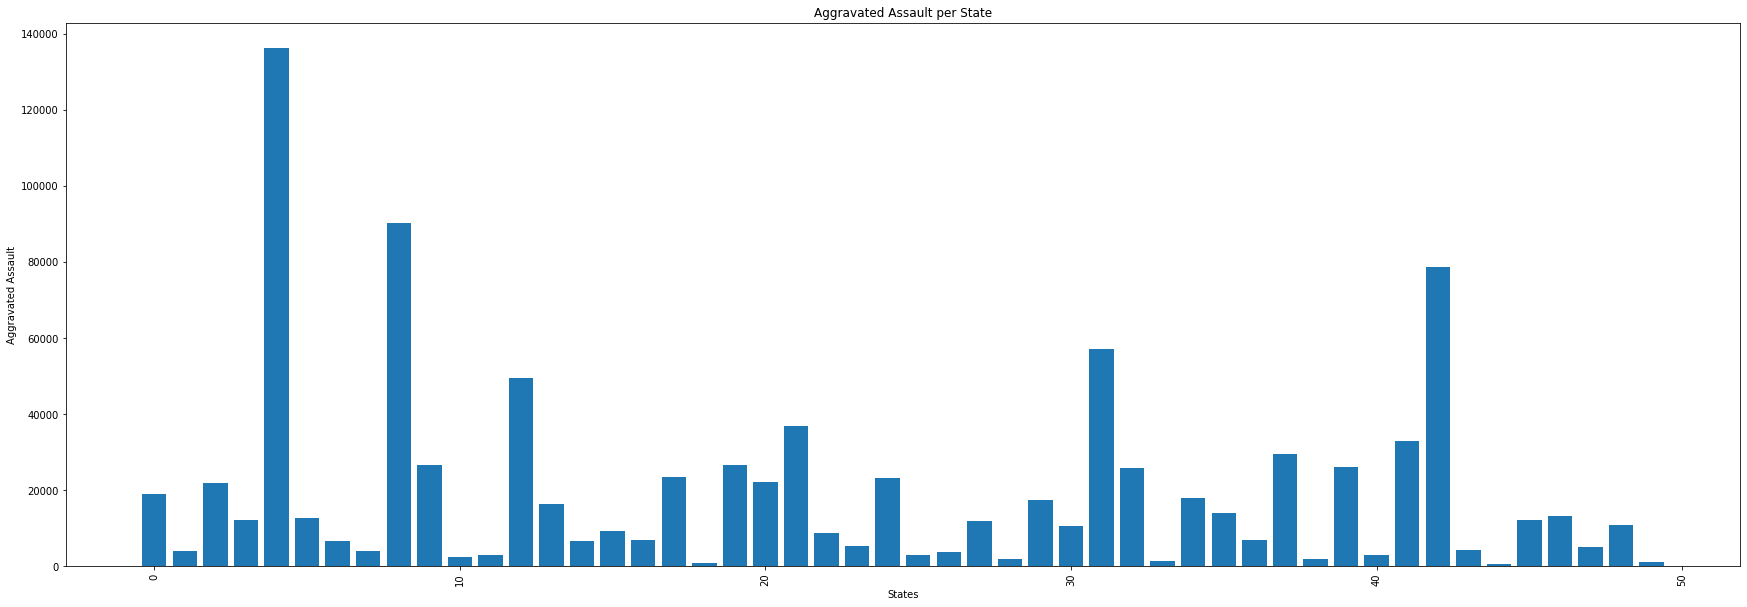

In [107]:
# Plot 4: Assault per state

plt.figure(figsize=(30, 10))
plt.bar(crime_df['jurisdiction'], crime_df['agg_assault'])
plt.title('Aggravated Assault per State')
plt.ylabel("Aggravated Assault")
plt.xlabel("States")
plt.xticks(rotation = 90)

In [84]:
# Plot 5: Includes jail or not based on the crimes

path=['murder_manslaughter','rape_legacy','agg_assault','burglary']
fig = px.bar(crime_df, x="jurisdiction", y=path, hover_data = ["includes_jails","year"], title="Includes jail or not based on the crimes")
fig.show()
fig.write_html("includes_jails.html")

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

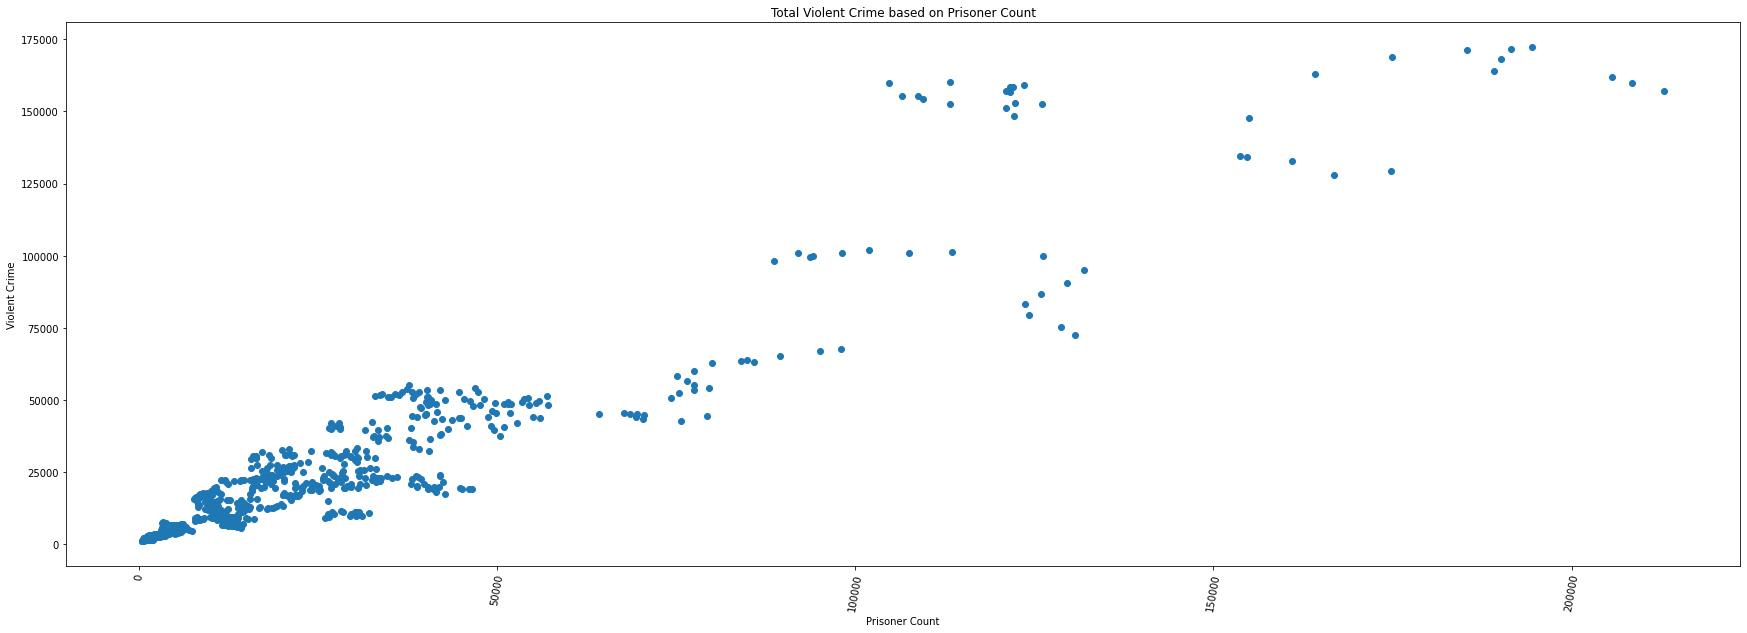

In [108]:
# Plot 6: Total Violent Crime based on the prisoner count
plt.figure(figsize=(30, 10))
plt.scatter(crime_df['violent_crime_total'], crime_df['prisoner_count'])
plt.title('Total Violent Crime based on Prisoner Count')
plt.ylabel("Violent Crime")
plt.xlabel("Prisoner Count")
plt.xticks(rotation = 80)

Text(0.5, 1.0, 'Amount of Prisoners per State')

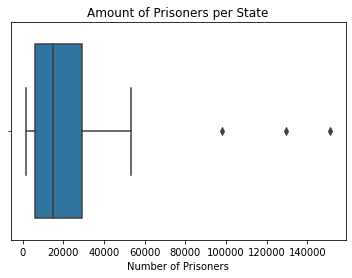

In [109]:
# Plot 7: Amount of prisoners per state

sns.boxplot(x="prisoner_count", data=crime_df.tail(50))
plt.xlabel("Number of Prisoners")
plt.title("Amount of Prisoners per State")

Data Analysis for the above plot:



#### Correlation Plot



In [87]:
corr=crime_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [89]:
# A correlation plot helps provide a visualization of the correlation between independent variables in the dataset. Correlation plots have three different types of correlation between variables; positive correlation, negative correlation, and zero correlation. When two variables increase or decrease together, they have a positive correlation, which is represented by a 1. When one variable increases and the other variable decreases, it is a negative correlation, which is represented by a -1. When two variables have no impact on each other, there is zero correlation, which is represented by a 0. Collinearity is the correlation between variables that expresses a linear relation in a regression model. Correlation indicates the strength of the linear relationship that might be existing between two variables. High Collinearity among these variables causes over fitting in the model. To avoid this its suggested to drop such variables.

## Feature Selection & Extraction



## Models



#### Label Encoding



In [90]:
labelencoder = LabelEncoder()
crime_df['jurisdiction Labels'] = labelencoder.fit_transform(crime_df["jurisdiction"])
crime_df['includes_jails Labels'] = labelencoder.fit_transform(crime_df["includes_jails"])
crime_df['jurisdiction'] = crime_df['jurisdiction Labels']
crime_df['includes_jails'] = crime_df['includes_jails Labels']
crime_df

jurisdiction  includes_jails  year  prisoner_count  \
1               0               0  2001           24741   
2               1               1  2001            4570   
3               2               0  2001           27710   
4               3               0  2001           11489   
5               4               0  2001          157142   
..            ...             ...   ...             ...   
811            45               0  2016           29882   
812            46               0  2016           17228   
813            47               0  2016            5899   
814            48               0  2016           23163   
815            49               0  2016            2352   

    crime_reporting_change crimes_estimated  state_population  \
1                    False            False         4468912.0   
2                    False            False          633630.0   
3                    False            False         5306966.0   
4                    False            False         2694698.0   
5                    False            False        34600463.0   
..                     ...              ...               ...   
811                  False            False         8414380.0   
812                  False            False         7280934.0   
813                  False            False         1828637.0   
814                  False            False         5772917.0   
815                  False            False          584910.0   

     violent_crime_total  murder_manslaughter  rape_legacy  agg_assault  \
1                19582.0                379.0  1369.000000      12250.0   
2                 3735.0                 39.0   501.000000       2681.0   
3                28675.0                400.0  1518.000000      17889.0   
4                12190.0                148.0   892.000000       8969.0   
5               212867.0               2206.0  9960.000000     136087.0   
..                   ...                  ...          ...          ...   
811              18495.0                482.0  1788.339119      10357.0   
812              22101.0                195.0  1788.339119      13124.0   
813               6633.0                 85.0  1788.339119       5144.0   
814              17716.0                232.0  1788.339119      10772.0   
815               1431.0                 20.0  1788.339119       1146.0   

     property_crime_total  burglary  jurisdiction Labels  \
1                173253.0   40642.0                    0   
2                 23160.0    3847.0                    1   
3                293874.0   54821.0                    2   
4                 99106.0   22196.0                    3   
5               1134189.0  232273.0                    4   
..                    ...       ...                  ...   
811              157292.0   20159.0                   45   
812              254994.0   49249.0                   46   
813               37282.0    9127.0                   47   
814              111911.0   19498.0                   48   
815               11460.0    1771.0                   49   

     includes_jails Labels  
1                        0  
2                        1  
3                        0  
4                        0  
5                        0  
..                     ...  
811                      0  
812                      0  
813                      0  
814                      0  
815                      0  

[799 rows x 15 columns]

In [91]:
training_features = ['jurisdiction','includes_jails','state_population','violent_crime_total','murder_manslaughter','rape_legacy','agg_assault','property_crime_total','burglary']
target = 'prisoner_count'

In [92]:
#new_cdf = jurisdiction, includes_jail, state_population, violent_crime_total, rape_revised, murder_manslaughter, agg_assault, property_crime_total, burglary 
train, test = train_test_split(crime_df, test_size=0.2, shuffle=True)
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]
print(test_X.shape[0], test_Y.shape[0])
train_X

160 160


jurisdiction  includes_jails  state_population  violent_crime_total  \
430            21               0         9969727.0              49825.0   
535            24               0         6008984.0              26888.0   
401            43               0         2736424.0               6165.0   
151            48               0         5474290.0              12104.0   
414             5               0         5024748.0              17022.0   
..            ...             ...               ...                  ...   
757            42               0        27469114.0             113227.0   
392            34               0        11485910.0              40436.0   
232            27               0         2412301.0              14654.0   
484            24               0         5995715.0              27440.0   
628            15               0         2895801.0               9928.0   

     murder_manslaughter  rape_legacy  agg_assault  property_crime_total  \
430                623.0       4524.0      32251.0              284019.0   
535                366.0       1469.0      18778.0              199085.0   
401                 41.0        915.0       3788.0               92373.0   
151                183.0       1202.0       6322.0              157684.0   
414                159.0       2269.0      11223.0              134196.0   
..                   ...          ...          ...                   ...   
757               1316.0       8925.0      67727.0              777739.0   
392                547.0       4531.0      16652.0              391667.0   
232                206.0       1016.0       8730.0              102424.0   
484                420.0       1445.0      19390.0              200858.0   
628                117.0       1003.0       7177.0               85704.0   

     burglary  
430   76046.0  
535   44875.0  
401   14766.0  
151   26546.0  
414   26637.0  
..        ...  
757  153054.0  
392  102428.0  
232   23481.0  
484   44197.0  
628   17476.0  

[639 rows x 9 columns]

#### Linear Model



In [93]:
model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression()

In [94]:
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

In [95]:
# Evaluation Metrics
print("Mean Absolute Error: ", mean_absolute_error(np.array(test_Y), test_pred_Y))
print("Mean Squared Error:", mean_squared_error(test_Y, test_pred_Y))
print("R-Squared value:", r2_score(test_Y, test_pred_Y))

# Accuracy
result = model.score(test_X, test_Y)
print("Accuracy: ", result)

Mean Absolute Error:  4929.39201256202
Mean Squared Error: 54226936.66742434
R-Squared value: 0.9447903707457528
Accuracy:  0.9423719146360928


#### Random Forest Regressor



In [96]:
regressor_rf = RandomForestRegressor(random_state = 40)

In [97]:
# Hyper Parameter Tuning using GridSearchCV

parameters = {"n_estimators" : [2000, 3000, 4000], "max_depth":[2,4,6,8,10], "max_features": ["sqrt", "log2"]}
grid_rf = GridSearchCV(estimator=regressor_rf, param_grid=parameters, cv= 4)
grid_rf.fit(train_X, train_Y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=40),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [2000, 3000, 4000]})

In [98]:
# Finding the best parameters
grid_rf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 3000}

In [99]:
rfr = RandomForestRegressor(random_state=42, max_features='sqrt', n_estimators= 2000, max_depth=10)
rfr.fit(train_X, train_Y)
random_result = rfr.predict(test_X)

# Evaluation Metrics
print("Mean Absolute Error: ", mean_absolute_error(np.array(test_Y), random_result))
print("Mean Squared Error:", mean_squared_error(test_Y, random_result))
print("R-Squared value:", r2_score(test_Y, random_result))


# Accuracy
resultrf = rfr.score(test_X, test_Y)
print("Accuracy: ", resultrf)

Mean Absolute Error:  1762.4088142007022
Mean Squared Error: 10866270.417087948
R-Squared value: 0.9889368126253717
Accuracy:  0.9889368126253717


#### Decision Tree Regressor



In [100]:
# Hyper Parameter Tuning using GridSearchCV

regressor_dt = DecisionTreeRegressor(random_state = 0)
parameters = {"criterion" : ["squared_error", "absolute_error", "poisson"], "max_depth":[2,4,6,8,10], "splitter": ["best", "random"]}
grid_dt = GridSearchCV(estimator=regressor_dt, param_grid=parameters, cv= 4)
grid_dt.fit(train_X, train_Y)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [101]:
# Finding the best parameters
grid_dt.best_params_

{'criterion': 'squared_error', 'max_depth': 8, 'splitter': 'random'}

In [102]:
dtr = DecisionTreeRegressor(criterion = "absolute_error", max_depth=10, splitter = "best")
dtr.fit(train_X, train_Y)
decision_result = dtr.predict(test_X)

# Evaluation Metrics
print("Mean Absolute Error: ", mean_absolute_error(np.array(test_Y), decision_result))
print("Mean Squared Error: ", mean_squared_error(test_Y, decision_result))
print("R-Squared value: ", r2_score(test_Y, decision_result))

# Accuracy
resultdt = dtr.score(test_X, test_Y)
print("Accuracy: ",resultdt)

Mean Absolute Error:  1338.7875
Mean Squared Error:  6826984.959375
R-Squared value:  0.9930492974212604
Accuracy:  0.9930492974212604


## Visualizations for the Model



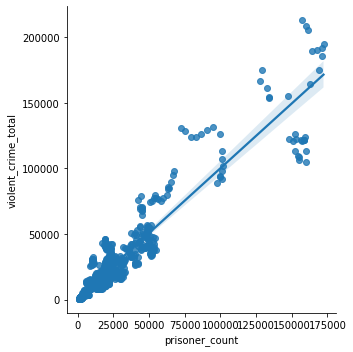

In [103]:
# Linear Regression Plot between prisoner count and total violent crimes
sns.lmplot(x="prisoner_count", y="violent_crime_total",data=crime_df)

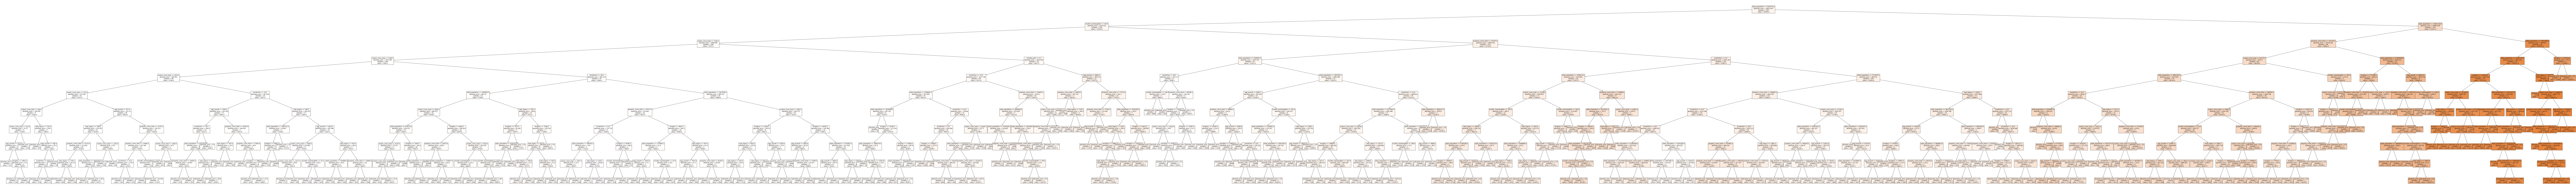

In [104]:
# Decision Tree
plt.figure(figsize=(400,30))
a = tree.plot_tree(dtr,
                   feature_names = training_features,
                   class_names = crime_df['prisoner_count'],
                   filled = True,
                   fontsize=12)
plt.show()

<AxesSubplot:>

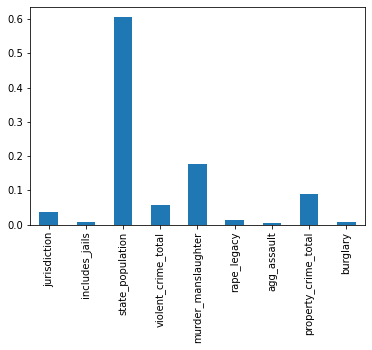

In [105]:
# Feature Importance in decision tree
pd.Series(dtr.feature_importances_, index = training_features).plot(kind = "bar")

<AxesSubplot:>

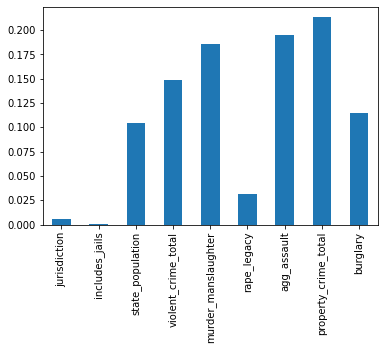

In [106]:
# Feature importance in Random Forest
pd.Series(rfr.feature_importances_, index = training_features).plot(kind = "bar")

## Conclusion



After doing the data analysis and model evaluation, our team came to a conclusion that the model Random Forest would work best for our dataset. Random Forest gave better accuracy after performing GridSearchCV in comparison to the linear Regression and decision trees, 

in which reduces the overfitting problems in decision trees and reduces the variance. Compares to decision tree, random forests are a stronger modeling technique and much more robust than a single decision tree, as they can aggregate many decision trees to limit overfitting as well as error due to bias and thefore yield usegul results. Random forests also consist of multiple single trees each based on a random sample of the training data, which were typically more accurate than single decision trees. 

